<h1>IS362 Week 7 </h1>

Analysis and Normalization of surveys for popular movies with a direct survey. 
6 movies were selected to survey for rating with people I know based on relationship.
The ratings were collected for each movie. Then put it into a MySQL database and exported into a CSV file.
The CSV file is analyzed.

<h2> First 

In [44]:
import pandas as pd
movies= r'C:\Users\turin\Downloads\IS362Week7movies.csv'
df=pd.read_csv(movies)
df.head()

,movie,survey,rating
0,Hundreds of Beavers,mom,1
1,The Crime is Mine,mom,2
2,Dune Part 2,mom,2
3,Monolith,mom,1
4,Drive Away Dolls,mom,2


<h1>1. Load the ratings by user information that you collected into a pandas dataframe.</h1>  

In [59]:
# Show the count of ratings for each survey. There was one rating per survey for each movie.
groupbydf = df.groupby(['movie', 'survey'])
groupbydf.sum()
#Since there is only one rating per survey per movie, the sum() function is just showing the corresponding rating.

rating
movie                     survey                  
Drive Away Dolls          brother in law         3
                          cousin                 1
                          coworker               5
                          friend                 4
                          imaginary friend       3
                          mom                    2
                          peer                   3
                          sibling                5
Dune Part 2               brother in law         1
                          cousin                 1
                          coworker               2
                          friend                 2
                          imaginary friend       2
                          mom                    2
                          peer                   5
                          sibling                5
Hundreds of Beavers       brother in law         1
                          cousin                 3
                          coworker               4
                          friend                 2
                          imaginary friend       1
                          mom                    1
                          peer                   4
                          sibling                5
Monolith                  brother in law         2
                          cousin                 2
                          coworker               3
                          friend                 3
                          imaginary friend       3
                          mom                    1
                          peer                   4
                          sibling                5
The Crime is Mine         brother in law         1
                          cousin                 2
                          coworker               1
                          friend                 1
                          imaginary friend       1
                          mom                    2
                          peer                   5
                          sibling                5
The Greatest Night in Pop brother in law         4
                          cousin                 1
                          coworker               3
                          friend                 5
                          imaginary friend       3
                          mom                    3
                          peer                   1
                          sibling                4

<h1>2. Show the average ratings for each user and each movie. </h1>

In [95]:
moviesratings= df[['movie','rating']]
moviesratings.groupby('movie').mean()

,rating
movie,
Drive Away Dolls,3.250
Dune Part 2,2.500
Hundreds of Beavers,2.625
Monolith,2.875
The Crime is Mine,2.250
The Greatest Night in Pop,3.000


In [96]:
surveyratings= df[['survey','rating']]
surveyratings.groupby('survey').mean()

,rating
survey,
brother in law,2.000000
cousin,1.666667
coworker,3.000000
friend,2.833333
imaginary friend,2.166667
mom,1.833333
peer,3.666667
sibling,4.833333


<h1> 3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average 
ratings for each user and each movie.</h1>

This took a very long time to figure out but it did succeed. I used the normalization function:

normalized value= ((value to be normalized) - Minimum value)/ (Max value - min value))*100

This will convert the values into a percentage. But any form of normalization can be used. For this case, since every rating was from 1-5 (No 0 was selected.) Any normalization formula can be used by defining the function as below and passing this data frame through with .apply(). 

In [144]:
groupbedf = df.groupby(['movie', 'survey']).sum()
def normalize(x):
       return ((x-0)/5)*100
normaldf= groupbedf.apply(normalize)
normaldf

rating
movie                     survey                  
Drive Away Dolls          brother in law      60.0
                          cousin              20.0
                          coworker           100.0
                          friend              80.0
                          imaginary friend    60.0
                          mom                 40.0
                          peer                60.0
                          sibling            100.0
Dune Part 2               brother in law      20.0
                          cousin              20.0
                          coworker            40.0
                          friend              40.0
                          imaginary friend    40.0
                          mom                 40.0
                          peer               100.0
                          sibling            100.0
Hundreds of Beavers       brother in law      20.0
                          cousin              60.0
                          coworker            80.0
                          friend              40.0
                          imaginary friend    20.0
                          mom                 20.0
                          peer                80.0
                          sibling            100.0
Monolith                  brother in law      40.0
                          cousin              40.0
                          coworker            60.0
                          friend              60.0
                          imaginary friend    60.0
                          mom                 20.0
                          peer                80.0
                          sibling            100.0
The Crime is Mine         brother in law      20.0
                          cousin              40.0
                          coworker            20.0
                          friend              20.0
                          imaginary friend    20.0
                          mom                 40.0
                          peer               100.0
                          sibling            100.0
The Greatest Night in Pop brother in law      80.0
                          cousin              20.0
                          coworker            60.0
                          friend             100.0
                          imaginary friend    60.0
                          mom                 60.0
                          peer                20.0
                          sibling             80.0

<h1>4. Provide a text-based conclusion: explain what might be advantages and disadvantages of using 
normalized ratings instead of the actual ratings.</h1>

Using the describe() on normalized data and plotting it shows that Drive Away Dolls and The Greatest Night in Pop were clear winners. The advantage of normalized data is the ability to compare data on the same scale for different statistical purposes. If I wanted to see which movie deviated the most from the standard deviation this plot shows the Crime is Mine was clearly the largest and least popular, while Drive Away Dolls was least and rather popular.

Using the regular rating data makes the bar chart much less interesting. See below charts comparing visualization of Describe() of normalized Df and unaltered Df. The normalized chart makes it much easier to study statistical comparisons in reference to a normalized range versus a numerical range, which can skew interpretation easily.

                 rating                                                   \
                  count       mean        std   min    25%    50%    75%   
survey                                                                     
brother in law      6.0  40.000000  25.298221  20.0   20.0   30.0   55.0   
cousin              6.0  33.333333  16.329932  20.0   20.0   30.0   40.0   
coworker            6.0  60.000000  28.284271  20.0   45.0   60.0   75.0   
friend              6.0  56.666667  29.439203  20.0   40.0   50.0   75.0   
imaginary friend    6.0  43.333333  19.663842  20.0   25.0   50.0   60.0   
mom                 6.0  36.666667  15.055453  20.0   25.0   40.0   40.0   
peer                6.0  73.333333  30.110906  20.0   65.0   80.0   95.0   
sibling             6.0  96.666667   8.164966  80.0  100.0  100.0  100.0   

                         
                    max  
survey                   
brother in law     80.0  
cousin             60.0  
coworker          100.0  
friend 

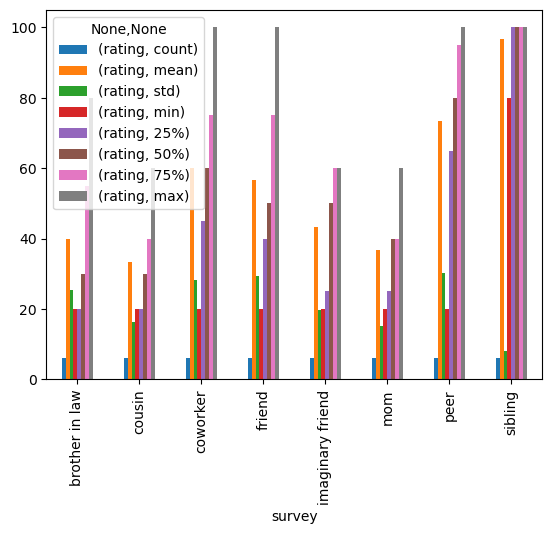

In [161]:
import matplotlib.pyplot as plt
plt.close("all")

normalized=normaldf.groupby(['movie']).describe()
print(
    normalized,
normalized.plot.bar())

<Axes: xlabel='movie'>

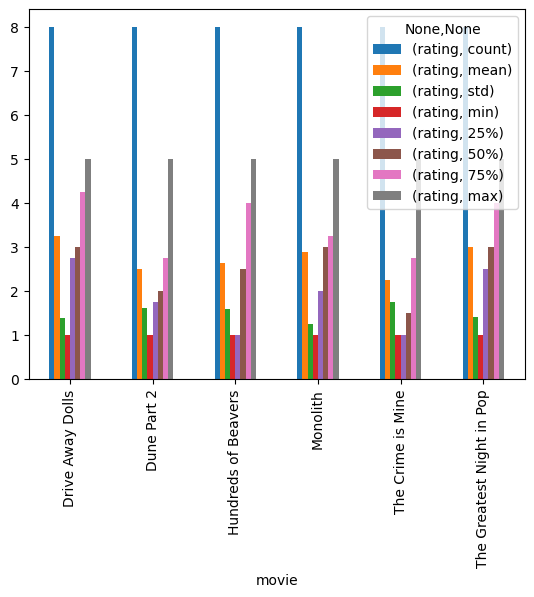

In [163]:
regular=df.groupby(['movie']).describe()
regular.plot.bar()